In [53]:
# pandas for data pre-processing
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# visualize the confusion matrix by use of seaborn library
import seaborn as sns

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# for numeric calculations
import numpy as np

In [55]:
data = pd.read_csv("/Users/cej12/Skrivebord/Untitled Folder/data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
#cleaning incorrect null values
lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in lst:
    data[i].replace(0, np.nan, inplace=True)
    data[i].fillna(df[i].median(), inplace=True)

In [58]:
X = data.drop("Outcome", axis=1).values
Y = data["Outcome"].values

In [59]:
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

In [60]:
# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [61]:
# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [62]:
# build the model from the train
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [63]:
# test the model on the test set
model.score(X_test, Y_test)

0.7467532467532467

In [64]:
X_test

array([[  1.   ,  90.   ,  62.   , ...,  27.2  ,   0.58 ,  24.   ],
       [  7.   , 181.   ,  84.   , ...,  35.9  ,   0.586,  51.   ],
       [ 13.   , 152.   ,  90.   , ...,  26.8  ,   0.731,  43.   ],
       ...,
       [  0.   , 128.   ,  68.   , ...,  30.5  ,   1.391,  25.   ],
       [  2.   , 100.   ,  66.   , ...,  32.9  ,   0.867,  28.   ],
       [  2.   ,  91.   ,  62.   , ...,  27.3  ,   0.525,  22.   ]])

In [65]:
# Test on the test data, try prediction
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [66]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, prediction))

0.7467532467532467


In [67]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
cmat = confusion_matrix(Y_test, prediction)
print(cmat)
print(classification_report(Y_test, prediction))

[[78 19]
 [20 37]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.66      0.65      0.65        57

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [68]:
confusion = pd.crosstab(Y_test,prediction)
confusion

col_0,0,1
row_0,,
0,78,19
1,20,37


In [73]:
names = ['no-diabetes', 'diabetes']

<Axes: >

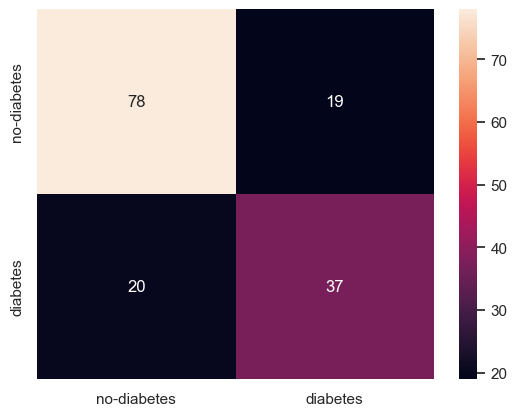

In [74]:
sns.heatmap(cmat, annot=True, xticklabels=names, yticklabels=names)

In [78]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['no-diabetes', 'diabetes']
print("\n" + "#"*40)

print("                    *** Bayes ***\n ")
print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, model.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, prediction, target_names=class_names))


########################################
                    *** Bayes ***
 

Classifier performance on training dataset

              precision    recall  f1-score   support

 no-diabetes       0.79      0.83      0.81       403
    diabetes       0.65      0.59      0.62       211

    accuracy                           0.75       614
   macro avg       0.72      0.71      0.71       614
weighted avg       0.74      0.75      0.74       614

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

 no-diabetes       0.80      0.80      0.80        97
    diabetes       0.66      0.65      0.65        57

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [79]:
testdata = pd.read_csv("/Users/cej12/Skrivebord/Untitled Folder/data/testy.csv")
testdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [81]:
t = testdata.values
t

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [82]:
test_prediction1 = model.predict(t)

In [83]:
test_prediction1

array([1], dtype=int64)

In [88]:
test2 = [[6, 148, 72, 35, 155.548, 33.6, 0.627, 50]]

In [89]:
test_prediction2 = model.predict(test2)

In [90]:
test_prediction2

array([1], dtype=int64)